In [1]:
import pandas as pd
import time

In [2]:
start_time = time.time()
d1 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2301-2306.csv')
d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')
d3 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2401-2405.csv')
tmp_data = pd.concat([d1, d2, d3], ignore_index=True)
print(round((time.time() - start_time)/60, 2))

C:\Users\research_01\AppData\Local\Temp\61\ipykernel_38752\1267394010.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')


2.74


In [3]:
data = tmp_data.copy()
data.rename(columns = {'이용시간(분)' : '이용시간'}, inplace = True)
data.rename(columns = {'이동거리(M)' : '이동거리'}, inplace = True)
data = data[data.이용시간 != 0]
data = data[data.이동거리 != 0]
data = data.dropna(axis=0)
print(len(tmp_data), len(data))

55032314 37904172


In [4]:
tmp = data['대여일자'].unique()
date_list = []
weekday_to_date = {}
for i in range(len(tmp)):
    date_list.append(int(tmp[i].replace('-','')))
    if i%7 not in weekday_to_date:
        weekday_to_date[i%7] = []
    weekday_to_date[i%7].append(tmp[i])
print(len(date_list))

517


In [5]:
date_to_weekday = dict()
for weekday, dates in weekday_to_date.items():
    for date in dates:
        date_to_weekday[date] = weekday
data['요일'] = data['대여일자'].map(date_to_weekday)

In [6]:
ph_day_list = ['2023-01-01','2023-01-21','2023-01-22','2023-01-23','2023-01-24','2023-03-01','2023-05-05',
                '2023-05-27','2023-05-29','2023-06-06','2023-08-15','2023-09-28','2023-09-29','2023-09-30',
                '2023-10-02','2023-10-03','2023-10-09','2023-12-25','2024-01-01','2024-02-09','2024-02-10',
                '2024-02-11','2024-02-12','2024-03-01','2024-04-10','2024-05-05','2024-05-06','2024-05-15']

date_to_phday = dict()
for weekday, dates in weekday_to_date.items():
    if weekday == 0 or weekday == 6:
        for date in dates:
            date_to_phday[date] = 0
    else:
        for date in dates:
            if date in ph_day_list:
                date_to_phday[date] = 0
            else:
                date_to_phday[date] = 1
                
phday_to_date = dict()
for date, phday in date_to_phday.items():
    if phday not in phday_to_date:
        phday_to_date[phday] = []
    phday_to_date[phday].append(date)
    
data['공휴일'] = data['대여일자'].map(date_to_phday)

In [7]:
temp = data.groupby('공휴일')['대여시간'].apply(list).to_dict()

In [8]:
cnt = 0
phday_dict = {0:[], 1:[]}
for key in sorted(temp.keys()):
    for i in range(24):
        print("{0:10.2f}".format(temp[key].count(i)/len(phday_to_date[key])))
        phday_dict[key].append(temp[key].count(i)/len(phday_to_date[key]))
        cnt += temp[key].count(i)
    print('\n{0:10.2f}'.format(len(temp[key])/len(phday_to_date[key])))
    print('='*20)

   1823.19
   1305.56
    902.95
    625.92
    462.99
    514.41
    779.22
   1181.40
   1909.25
   2426.10
   2702.56
   3017.51
   3502.80
   3830.02
   3969.51
   4252.60
   4547.92
   4659.22
   4314.83
   3694.82
   3337.43
   3050.10
   2541.66
   1843.86

  61195.83
   1462.59
    999.51
    642.94
    452.27
    430.86
    906.19
   2031.18
   4727.98
   6447.11
   3583.83
   2589.54
   2967.67
   3236.13
   3101.60
   3143.83
   3610.69
   4666.58
   6368.61
   7947.02
   5468.08
   4523.40
   4109.37
   3499.99
   2181.51

  79098.48


In [9]:
phday_dict

{0: [1823.1916167664672,
  1305.562874251497,
  902.9461077844311,
  625.9161676646706,
  462.9940119760479,
  514.4071856287425,
  779.2215568862275,
  1181.3952095808384,
  1909.245508982036,
  2426.0958083832334,
  2702.562874251497,
  3017.5149700598804,
  3502.802395209581,
  3830.017964071856,
  3969.508982035928,
  4252.604790419162,
  4547.922155688623,
  4659.215568862275,
  4314.832335329342,
  3694.820359281437,
  3337.431137724551,
  3050.1017964071857,
  2541.6586826347307,
  1843.8562874251497],
 1: [1462.5885714285714,
  999.5057142857142,
  642.94,
  452.27142857142854,
  430.85714285714283,
  906.1885714285714,
  2031.18,
  4727.982857142857,
  6447.111428571428,
  3583.8285714285716,
  2589.542857142857,
  2967.6685714285713,
  3236.134285714286,
  3101.602857142857,
  3143.825714285714,
  3610.691428571429,
  4666.58,
  6368.614285714286,
  7947.022857142857,
  5468.0771428571425,
  4523.397142857143,
  4109.365714285715,
  3499.9914285714285,
  2181.5142857142855]}

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
import numpy as np

In [11]:
labels = np.arange(24)

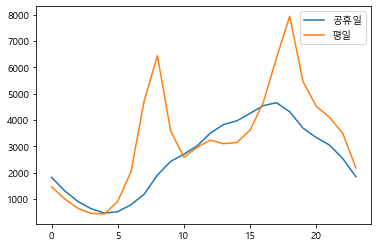

In [12]:
plt.plot(labels, phday_dict[0], label = '공휴일')
plt.plot(labels, phday_dict[1], label = '평일')
plt.legend()
plt.show()

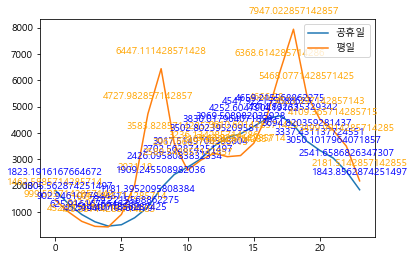

In [13]:
plt.plot(labels, phday_dict[0], label = '공휴일')
plt.plot(labels, phday_dict[1], label = '평일')

for i, label in enumerate(labels):
    plt.text(label, phday_dict[0][i] + 500, str(phday_dict[0][i]), ha='center', va='bottom', color='blue')
    plt.text(label, phday_dict[1][i] + 500, str(phday_dict[1][i]), ha='center', va='bottom', color='orange')

plt.legend()
plt.show()